In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)

# Load dataset 
df = pd.read_csv(r"D:\data science\Assignments\assign\diabetes.csv")

# First few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Check basic info
df.info()

# Summary statistics
df.describe(include='all')

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

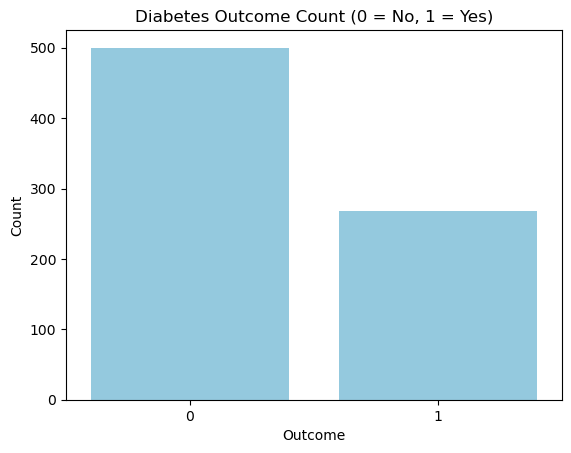

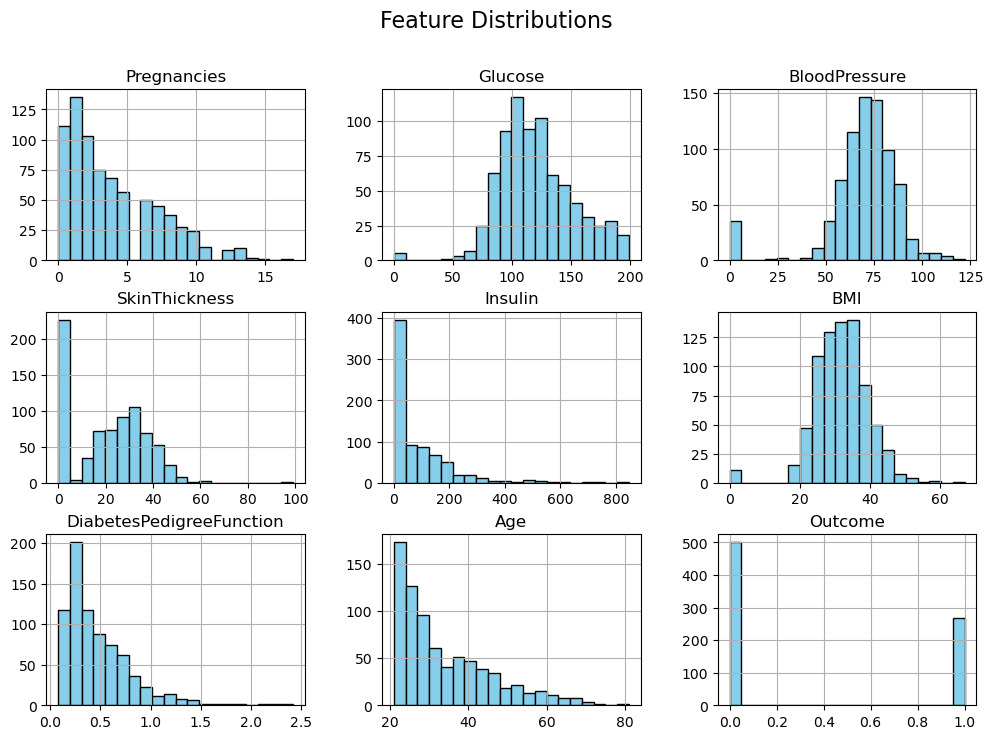

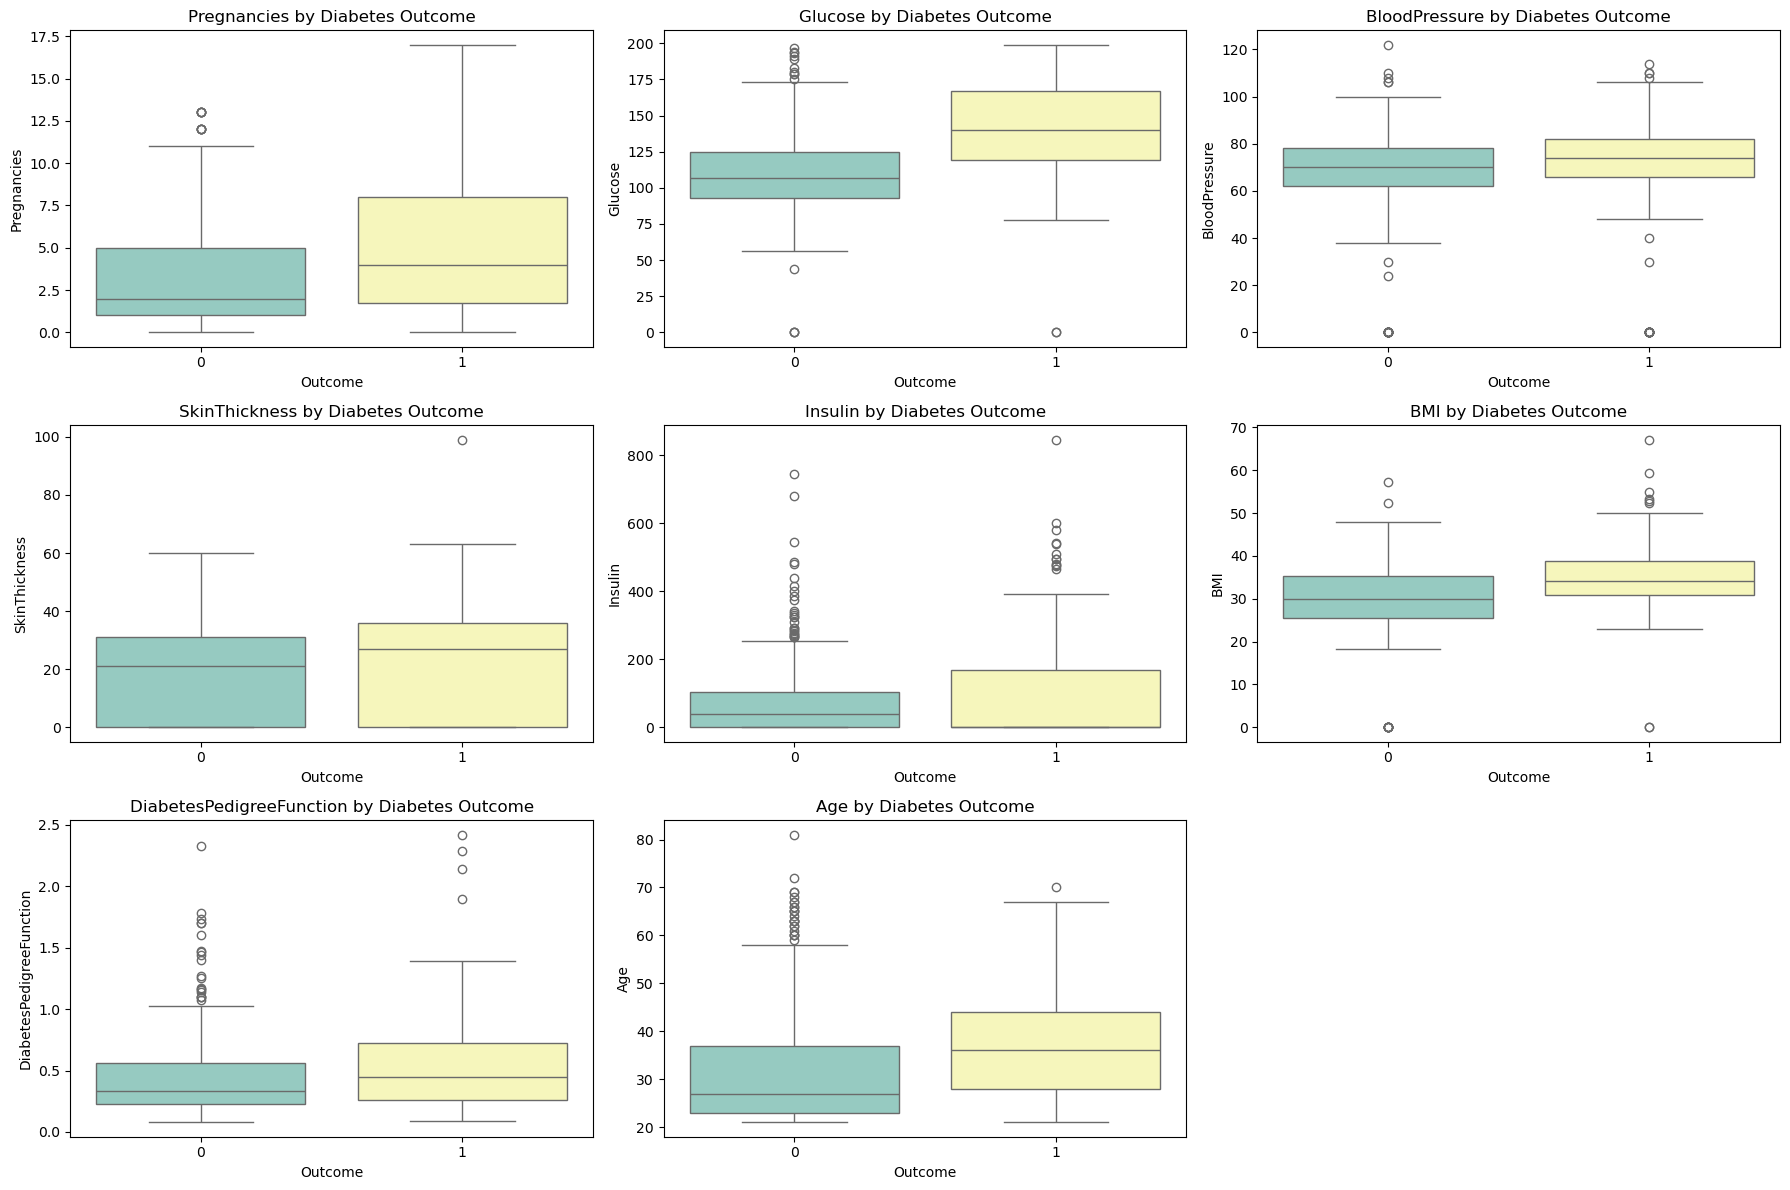

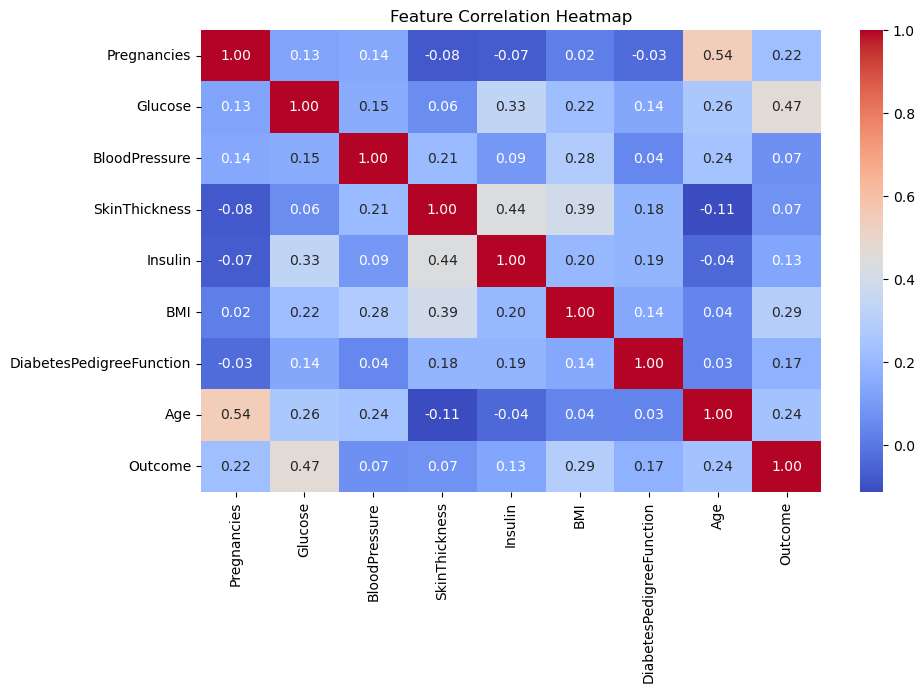

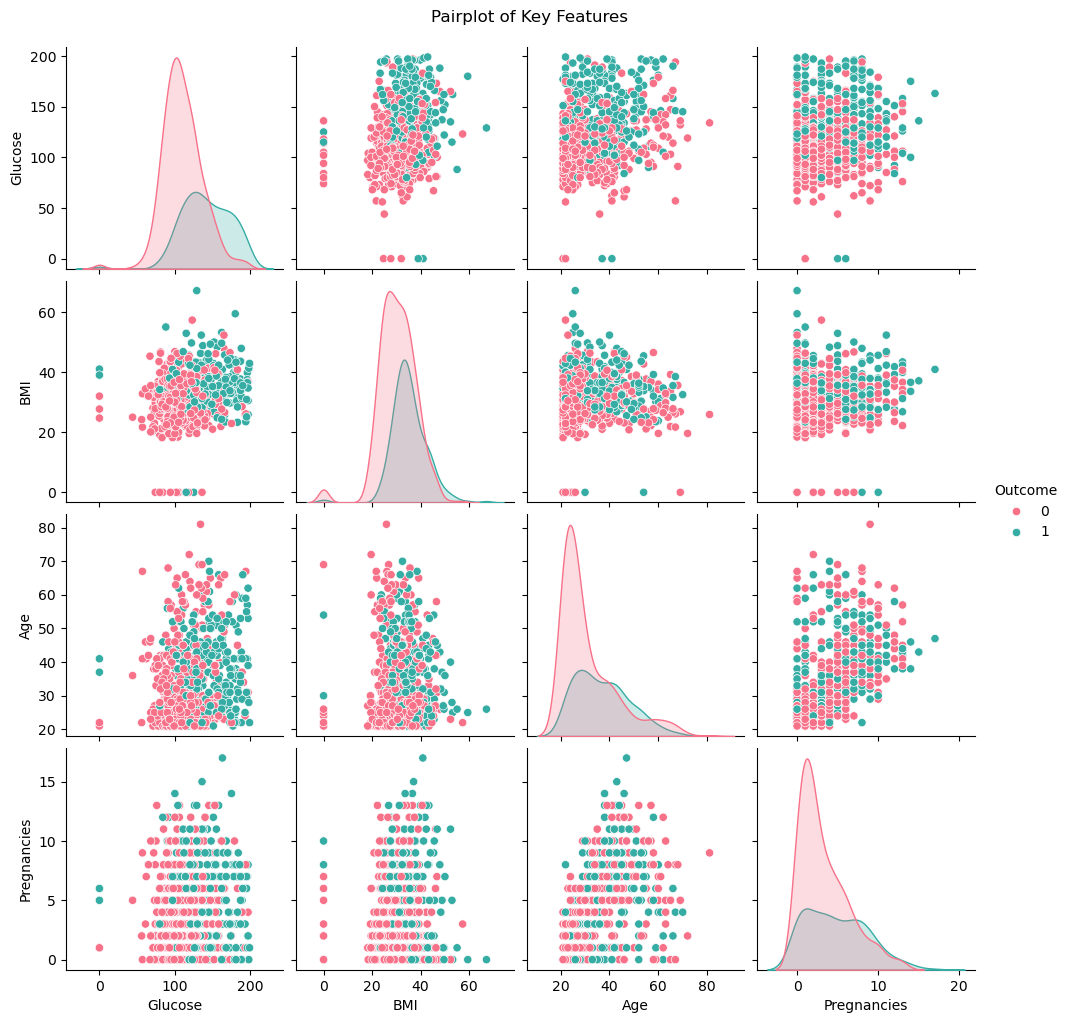

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

#  Distribution of target variable
sns.countplot(x='Outcome', data=df, color='skyblue')
plt.title("Diabetes Outcome Count (0 = No, 1 = Yes)")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

#  Numerical feature distributions
df.hist(bins=20, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

#  Boxplots for each feature vs Outcome
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
             'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y=feature, hue='Outcome', data=df, palette='Set3', legend=False)
    plt.title(f"{feature} by Diabetes Outcome")
plt.tight_layout()
plt.show()


#  Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

#  Pairplot (optional – only selected features)
selected_features = ['Outcome', 'Glucose', 'BMI', 'Age', 'Pregnancies']
sns.pairplot(df[selected_features], hue='Outcome', diag_kind='kde', palette='husl')
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()


In [7]:
# Handle missing or zero values in key columns
# In the diabetes dataset, some columns have 0s instead of NaN — we’ll replace them with NaN first
import numpy as np

# Columns where 0 indicates missing values
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

# Fill NaN values with the median (future-proof version)
for col in cols_with_zero:
    df[col] = df[col].fillna(df[col].median())

# Verify preprocessing
print(df.isnull().sum())  # should show 0 missing values
df.head()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [8]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((614, 8), (154, 8))

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns

# Features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.6181818181818182
F1 Score: 0.6415094339622641
ROC-AUC Score: 0.8211202938475666


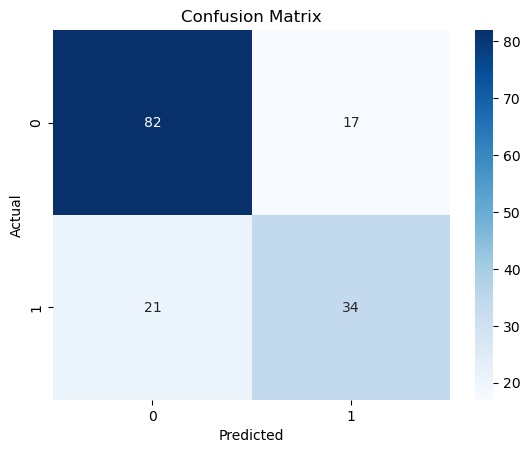

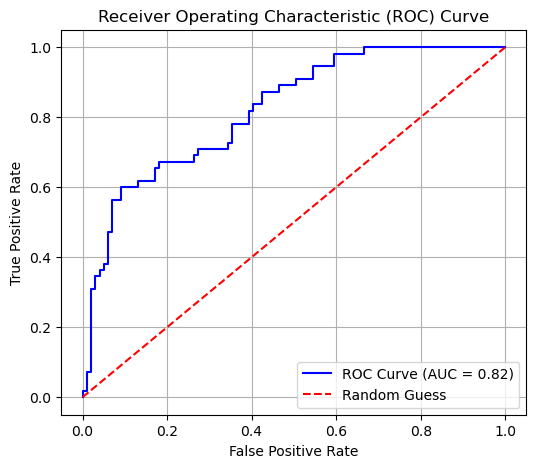

In [10]:
# Predictions
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [11]:
# Coefficients interpretation
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coef_df)

# Discussion:
# Positive coefficients increase the survival odds,
# Negative coefficients decrease it.


                    Feature  Coefficient
6  DiabetesPedigreeFunction     0.553710
5                       BMI     0.101803
0               Pregnancies     0.067597
1                   Glucose     0.037338
7                       Age     0.034615
3             SkinThickness     0.007715
4                   Insulin    -0.001669
2             BloodPressure    -0.013236


In [19]:

import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your dataset 
df = pd.read_csv(r"D:\data science\Assignments\assign\diabetes.csv")


# Split data
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save both model and scaler
pickle.dump(model, open('logistic_model.pkl', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))

print(" Model saved successfully!")


 Model saved successfully!


In [ ]:
# Interview question's

# 1. What is the difference between precision and recall?
# Precision → Out of all predicted positives, how many were actually positive.
   # Precision = TP / (TP + FP)
# Recall → Out of all actual positives, how many were correctly identified.
    # Recall = TP / (TP + FN)

# 2. What is cross-validation, and why is it important in binary classification?
 # Cross-validation is a technique to test a model’s performance on different subsets of data to ensure it generalizes well.
 # In k-fold cross-validation, the data is split into k parts — the model trains on (k–1) folds and tests on the remaining one, repeating this k times.
 # Importance in binary classification:
#  Reduces overfitting
 # Gives a more reliable accuracy estimate
  # Ensures the model performs well on unseen data

